In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
# pixel values are getting changed to tensor values
# tensors= multidensional arrays
# grayscale= 2d tensor, colored= 3d tensor

# then, a mean and standard deviation normalization
# Brightness and Contrast: Adjusting the brightness and contrast of an image is one part of normalization. This ensures that all images in a dataset have consistent lighting conditions, making them easier to compare and analyze.
# Scaling: Scaling refers to resizing images to a uniform size or resolution. This step ensures that all images have the same dimensions, which is essential for feeding them into machine learning models.
# Color Channels: For color images, it's important to normalize the color channels. This can involve scaling the color values to a specific range, such as between 0 and 1, or standardizing them to have a mean of 0 and a standard deviation of 1.
# Centering: Centering involves shifting the pixel values so that they have a common reference point. For example, subtracting the mean pixel value of the entire dataset can center the data around zero.
# Standardization: Standardization is about making the pixel values have a similar scale. This is often done by dividing the pixel values by the standard deviation of the entire dataset.
# Channel-wise Normalization: In color images, it's common to perform normalization separately for each color channel (e.g., red, green, and blue). This ensures that color information is consistent.
# Data Type Conversion: Converting pixel values to a specific data type, such as floating-point numbers, can also be part of normalization.


transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
# Load the full MNIST dataset
full_trainset = datasets.MNIST('full_trainset', download=True, train=True, transform=transform)

# Split the full_trainset into trainset, valset, and testset
train_size = int(0.8 * len(full_trainset))
val_size = int(0.1 * len(full_trainset))
test_size = len(full_trainset) - (train_size + val_size)

trainset, valset, testset = torch.utils.data.random_split(full_trainset, [train_size, val_size, test_size])

# Create data loaders for trainset, valset, and testset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)  # No need to shuffle validation set
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# uses of a DataLoader:
# Batching: A DataLoader divides a dataset into smaller batches or mini-batches. Each batch contains a fixed number of data samples. Batching is essential for training deep learning models because it allows you to process a manageable amount of data at a time, which is often more memory-efficient and can lead to faster training.
# Shuffling: Many machine learning models benefit from seeing data in a random order during each training epoch. A DataLoader can shuffle the data automatically before creating batches. Shuffling helps prevent the model from learning patterns based on the order of the data and ensures that the model generalizes better.
# Parallel Data Loading: If you have access to multiple CPU cores or GPUs, DataLoader can load and preprocess data samples in parallel. This parallelism can significantly speed up the training process, especially when dealing with large datasets.
# Data Transformation: DataLoader allows you to apply data transformations to each batch of data on the fly. Common transformations include resizing images, normalizing pixel values, and converting data to tensors. These transformations can be specified when creating the DataLoader.
# Iterating Over the Dataset: Once a DataLoader is created, you can use it as an iterator to iterate over the batches of data in a for loop. This makes it easy to feed batches of data to your machine learning model during training or evaluation.


# Shuffling the training dataset is essential because it helps the model generalize better.
# It prevents the model from learning patterns based on the order of the data points.
# Shuffling ensures that each batch of training data consists of randomly selected samples from the entire dataset,
# which helps the model learn a more robust representation of the data.

In [4]:
dataiter = iter(trainloader)
images, labels  = next(dataiter)

print(images.shape)
print(labels.shape)

# The shape provides information about the number of images in the batch,
# the number of color channels (if applicable), and the dimensions of each image (e.g., height and width).
# The specific numbers will depend on the batch size and the size of the individual images.

# The shape of the labels tensor typically corresponds to the number of labels in the batch, which should match the batch size.

torch.Size([64, 1, 28, 28])
torch.Size([64])


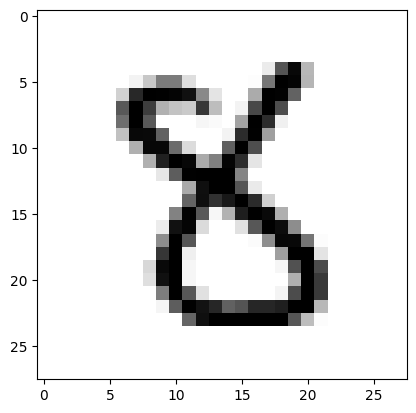

In [5]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

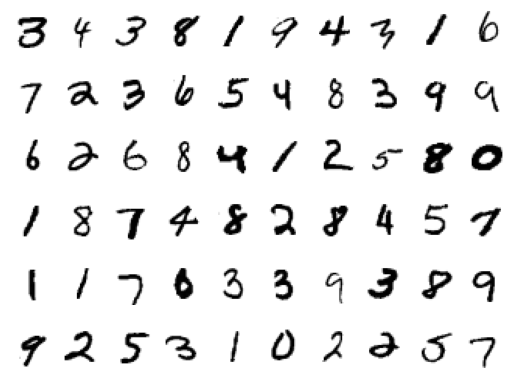

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
input_size = 784
# This sets the number of input features or neurons in the input layer.
# In this context, it suggests that the model expects input data with 784 features.
# This size is often used for handling flattened 28x28 pixel images (common in MNIST digit recognition) since 28x28 = 784.

hidden_sizes = [128, 64]
# This is a list that defines the sizes of the hidden layers in the neural network.
# In this case, there are two hidden layers with 128 and 64 neurons, respectively.

output_size = 10
# This specifies the number of neurons in the output layer.
# In the context of digit recognition, this often corresponds to the number of possible classes (digits 0 through 9).

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [8]:
# NLL: Negative Loss Likelihood

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

# After this code is executed, you will have the loss value (loss),
# which represents how well or poorly the model is performing on the current batch of training data.
# The goal during training is to minimize this loss by adjusting the
# model's parameters (weights and biases) through techniques like backpropagation and gradient descent,
# so that the model becomes better at making accurate predictions.

# Sending the images through the model without training it serves several purposes:
# Initialization: Before training, the model's parameters (weights and biases) are typically initialized randomly or with some predefined values. By forwarding a batch of images through the untrained model, you can observe how the model's initial random predictions look. This can be helpful for debugging and understanding the model's behavior at the beginning of training.
# Understanding Initial Predictions: Examining the initial predictions can provide insights into whether the model is starting with some biases or if it's making random predictions. This can help you gauge the starting point of the training process.
# Loss Computation: In the code you provided, you calculate the loss (loss.backward()) even before training. While this loss doesn't mean much in terms of model performance at this stage (since the model hasn't learned anything yet), it's computed to set up the backward pass. During training, the backward pass is used to calculate gradients, which guide the parameter updates to minimize this loss.
# Debugging: If there are any issues with the model's architecture, shape compatibility, or data preprocessing, forwarding a batch of data through the untrained model can help identify these issues early on. It's a common practice to perform a "sanity check" on the model and the data pipeline at the beginning of the training process.

In [9]:
print('Before backward pass: \n', model[0].weight.grad)
# prints the gradients of the weights of the first layer (model[0].weight) before the backward pass.
# When you initialize a model, the gradients are typically set to None or zero.

loss.backward()
# This line computes gradients for all the learnable parameters in the model, including the weights and biases, with respect to the loss.
# calculates how much each parameter should be adjusted to minimize the loss.

print('After backward pass: \n', model[0].weight.grad)
# prints the gradients of the weights of the first layer after the backward pass.
# These gradients represent how much the weights of the first layer should be updated to reduce the loss.

Before backward pass: 
 None
After backward pass: 
 tensor([[ 3.1519e-03,  3.1519e-03,  3.1519e-03,  ...,  3.1519e-03,
          3.1519e-03,  3.1519e-03],
        [-5.0296e-05, -5.0296e-05, -5.0296e-05,  ..., -5.0296e-05,
         -5.0296e-05, -5.0296e-05],
        [-4.3994e-03, -4.3994e-03, -4.3994e-03,  ..., -4.3994e-03,
         -4.3994e-03, -4.3994e-03],
        ...,
        [ 3.4622e-04,  3.4622e-04,  3.4622e-04,  ...,  3.4622e-04,
          3.4622e-04,  3.4622e-04],
        [-1.2849e-03, -1.2849e-03, -1.2849e-03,  ..., -1.2849e-03,
         -1.2849e-03, -1.2849e-03],
        [-2.5314e-03, -2.5314e-03, -2.5314e-03,  ..., -2.5314e-03,
         -2.5314e-03, -2.5314e-03]])


In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
# initializes the stochastic gradient descent (SGD) optimizer.
# learning rate and momentum are hyperparameters that control the step size and momentum of the optimization process.


# Initialize lists to store metrics
losses = []
accuracies = []
val_losses = []
val_accuracies = []

time0 = time()
epochs = 8

for e in range(epochs):
    running_loss = 0
    correct_count = 0

    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate accuracy for this batch
        _, predicted = torch.max(output.data, 1)
        correct_count += (predicted == labels).sum().item()

    # Calculate average loss and accuracy for this epoch
    avg_loss = running_loss / len(trainloader)
    accuracy = correct_count / len(trainloader.dataset)

    # Append loss and accuracy to lists
    losses.append(avg_loss)
    accuracies.append(accuracy)

    # Print epoch results for training
    print(f"Epoch {e+1}/{epochs} - Training loss: {avg_loss:.4f}, Training Accuracy: {accuracy:.4f}")

    # Validation loop
    model.eval()  # Set the model to evaluation mode

    val_loss = 0
    val_correct_count = 0

    with torch.no_grad():
        for images, labels in valloader:
            images = images.view(images.shape[0], -1)
            output = model(images)
            val_loss += criterion(output, labels).item()

            # Calculate accuracy for this batch
            _, predicted = torch.max(output.data, 1)
            val_correct_count += (predicted == labels).sum().item()

    # Calculate average validation loss and accuracy
    avg_val_loss = val_loss / len(valloader)
    val_accuracy = val_correct_count / len(valloader.dataset)

    # Append validation metrics to lists
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)
    # Print epoch results for validation
    print(f"Epoch {e+1}/{epochs} - Validation loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/8 - Training loss: 0.7265, Training Accuracy: 0.7845
Epoch 1/8 - Validation loss: 0.3454, Validation Accuracy: 0.8992
Epoch 2/8 - Training loss: 0.3055, Training Accuracy: 0.9100
Epoch 2/8 - Validation loss: 0.3042, Validation Accuracy: 0.9087
Epoch 3/8 - Training loss: 0.2433, Training Accuracy: 0.9281
Epoch 3/8 - Validation loss: 0.2314, Validation Accuracy: 0.9342
Epoch 4/8 - Training loss: 0.2012, Training Accuracy: 0.9403
Epoch 4/8 - Validation loss: 0.1966, Validation Accuracy: 0.9415
Epoch 5/8 - Training loss: 0.1715, Training Accuracy: 0.9499
Epoch 5/8 - Validation loss: 0.1798, Validation Accuracy: 0.9473
Epoch 6/8 - Training loss: 0.1489, Training Accuracy: 0.9565
Epoch 6/8 - Validation loss: 0.1574, Validation Accuracy: 0.9525
Epoch 7/8 - Training loss: 0.1314, Training Accuracy: 0.9611
Epoch 7/8 - Validation loss: 0.1488, Validation Accuracy: 0.9545
Epoch 8/8 - Training loss: 0.1169, Training Accuracy: 0.9657
Epoch 8/8 - Validation loss: 0.1404, Validation Accuracy:

In [11]:
torch.save(model, './my_mnist_modelfinal.pt')

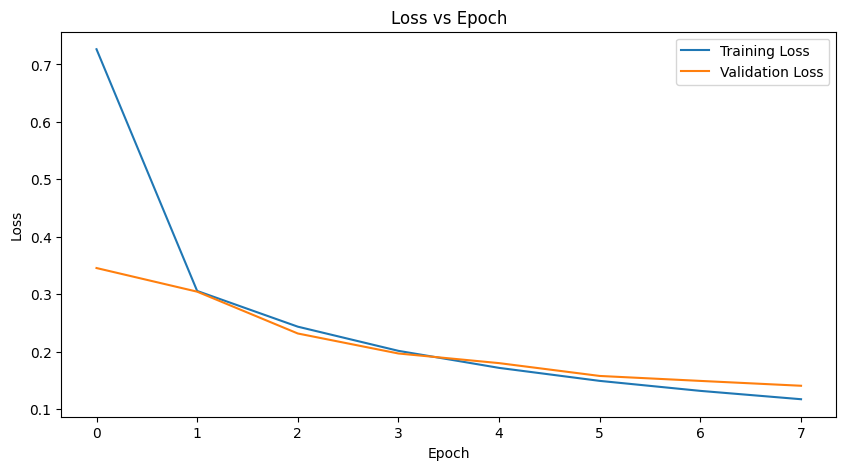

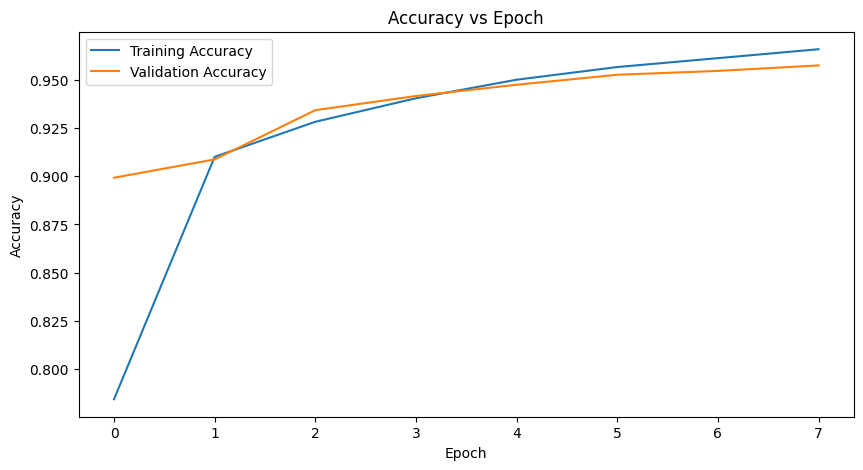

In [12]:
# Plot loss vs epoch for both training and validation
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot accuracy vs epoch for both training and validation
plt.figure(figsize=(10, 5))
plt.plot(accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [14]:
model = torch.load('my_mnist_modelfinal.pt')
model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

Predicted Digit = 3


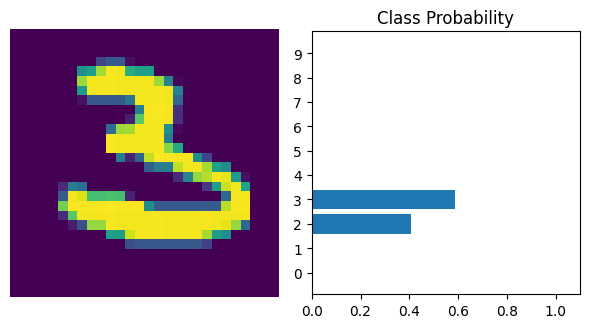

In [15]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [16]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 6000

Model Accuracy = 0.9573333333333334


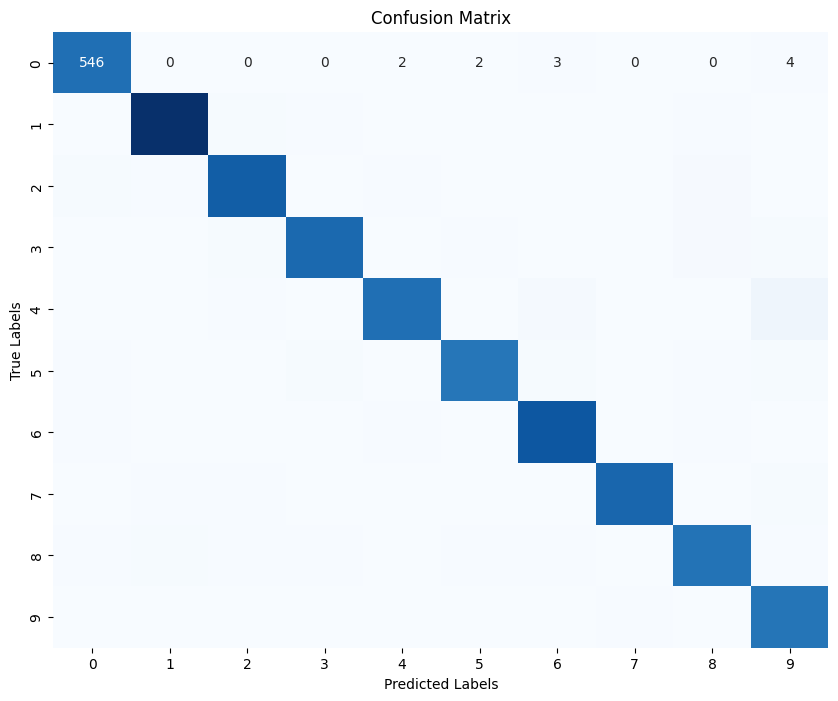

Class 0:
True Positives: 546,
True Negatives: 5420,
False Positives: 23,
False Negatives: 11

Class 1:
True Positives: 722,
True Negatives: 5244,
False Positives: 15,
False Negatives: 19

Class 2:
True Positives: 595,
True Negatives: 5350,
False Positives: 26,
False Negatives: 29

Class 3:
True Positives: 562,
True Negatives: 5383,
False Positives: 17,
False Negatives: 38

Class 4:
True Positives: 547,
True Negatives: 5386,
False Positives: 14,
False Negatives: 53

Class 5:
True Positives: 526,
True Negatives: 5431,
False Positives: 15,
False Negatives: 28

Class 6:
True Positives: 614,
True Negatives: 5347,
False Positives: 29,
False Negatives: 10

Class 7:
True Positives: 570,
True Negatives: 5395,
False Positives: 14,
False Negatives: 21

Class 8:
True Positives: 534,
True Negatives: 5398,
False Positives: 35,
False Negatives: 33

Class 9:
True Positives: 528,
True Negatives: 5390,
False Positives: 68,
False Negatives: 14



In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Set the model to evaluation mode
model.eval()

# Lists to store true and predicted labels
true_labels = []
pred_labels = []

# Iterate through the validation data loader
for images, labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)

        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]

        true_labels.append(true_label)
        pred_labels.append(pred_label)

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print true positives, true negatives, false positives, false negatives for each class
for i in range(10):  # Assuming 10 classes
    tp = conf_matrix[i, i]
    tn = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
    fp = np.sum(conf_matrix[:, i]) - tp
    fn = np.sum(conf_matrix[i, :]) - tp
    print(f"Class {i}:")
    print(f"True Positives: {tp},\nTrue Negatives: {tn},\nFalse Positives: {fp},\nFalse Negatives: {fn}")
    print()

In [18]:
# Print the classification report
target_names = [str(i) for i in range(10)]
print(classification_report(true_labels, pred_labels, target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       557
           1       0.98      0.97      0.98       741
           2       0.96      0.95      0.96       624
           3       0.97      0.94      0.95       600
           4       0.98      0.91      0.94       600
           5       0.97      0.95      0.96       554
           6       0.95      0.98      0.97       624
           7       0.98      0.96      0.97       591
           8       0.94      0.94      0.94       567
           9       0.89      0.97      0.93       542

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



EXTRA TASK : MAKE A CONFUSION MATRIX FOR INDIVIDUAL CLASSES

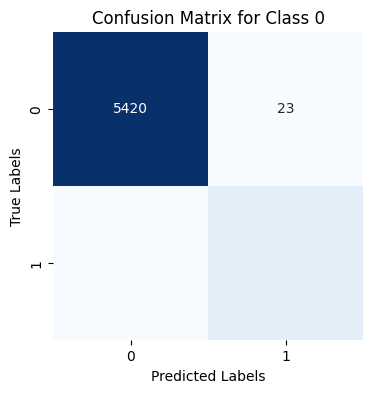

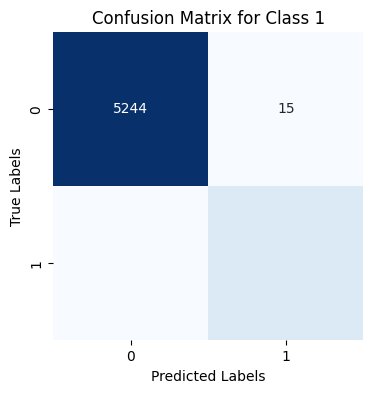

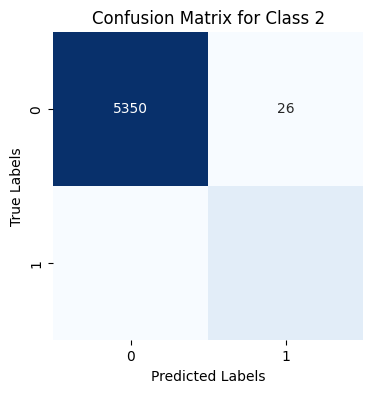

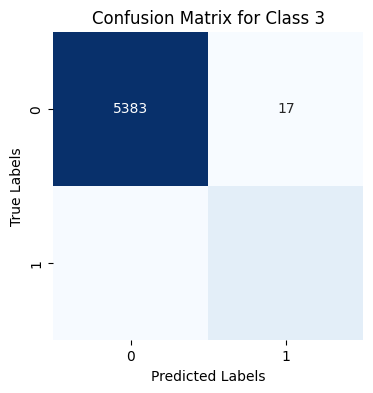

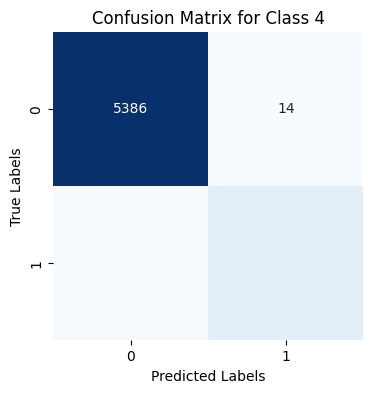

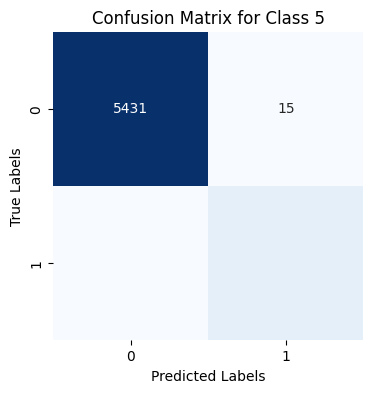

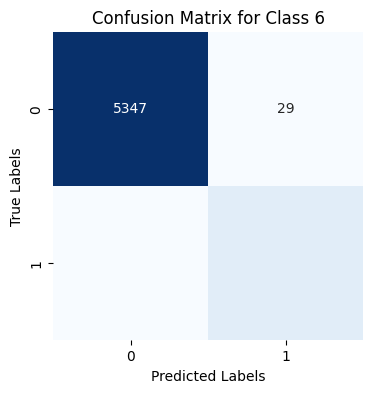

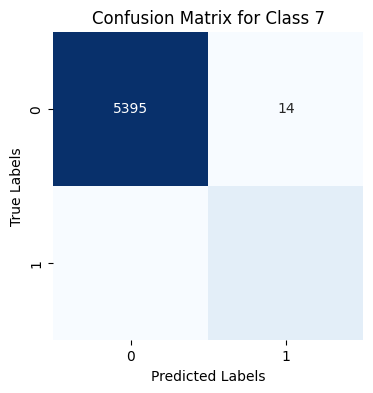

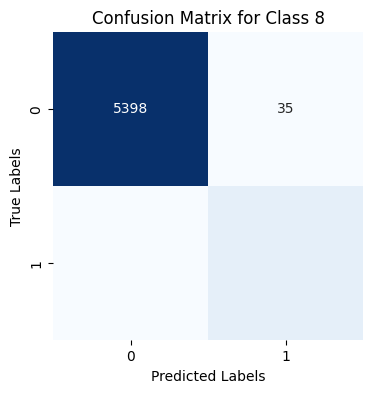

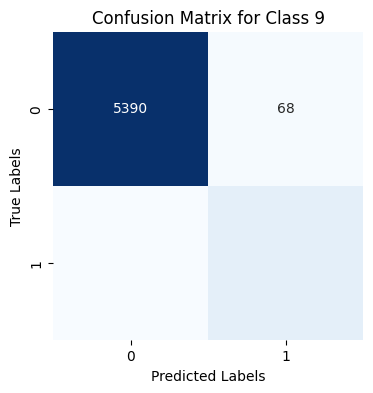

In [19]:
#individual confusion matrices for each class vs the rest of the classes
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Set the model to evaluation mode
model.eval()


# Iterate through the validation data loader

for k in range(10):
    # Lists to store true and predicted labels
    true_labels = []
    pred_labels = []

    absolute_true=k
    for images, labels in valloader:
        for i in range(len(labels)):
            img = images[i].view(1, 784)
            with torch.no_grad():
                logps = model(img)

            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]

            if true_label==absolute_true:
                true_labels.append(1)
            else:
                true_labels.append(0)
            if pred_label==absolute_true:
                pred_labels.append(1)
            else:
                pred_labels.append(0)

    # Create a confusion matrix
    conf_matrix = confusion_matrix(true_labels, pred_labels)

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for Class {k}")
    plt.show()


***IMPORTANT*** <br><br>
WE HAVE CREATED TWO FUNCTION FOR YOUR EASE: <br>
1) ONE FOR BLACK TEXT ON WHITE. <br>
2) ONE FOR WHITE TEXT ON BLACK<br>
<br>
Create two different folders as seen in the below code and add the respective files as sent on the whatsapp group to those folders, link the paths to the code below and run them appropriately.

Predicted Digit = 5
Predicted Digit = 9
Predicted Digit = 3


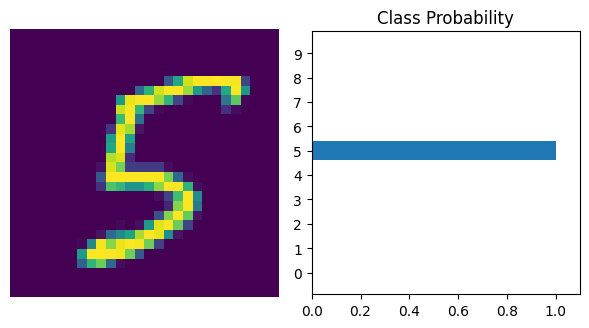

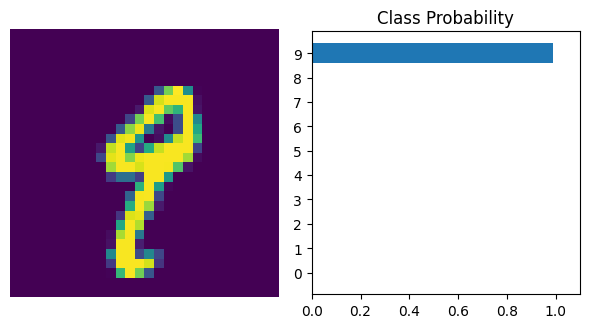

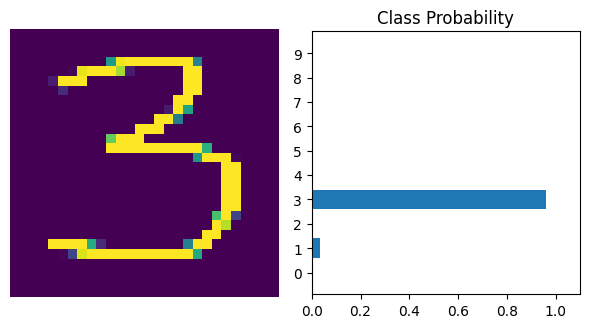

In [20]:
#if the image has a (white) handwritten digit over a black background, use this, else comment the whole cell out
from PIL import Image, ImageOps
import os

def preprocess_user_image(image_path):
    user_image = Image.open(image_path).convert("L")
    user_image = user_image.resize((28, 28))
    user_image = transform(user_image).view(1, 784)
    return user_image

# Get the path to the user's image

for image in os.listdir('whiteonblack'):
    user_image_path = os.path.join("whiteonblack/", image)
    if os.path.isfile(user_image_path):
        # Preprocess the user's image
        user_input = preprocess_user_image(user_image_path)

        # Use the trained model to make a prediction
        with torch.no_grad():
            logps = model(user_input)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])

        predicted_digit = probab.index(max(probab))
        print("Predicted Digit =", predicted_digit)
        view_classify(user_input.view(1, 28, 28), ps)

Predicted Digit = 0
Predicted Digit = 3
Predicted Digit = 2
Predicted Digit = 3
Predicted Digit = 4
Predicted Digit = 3
Predicted Digit = 5
Predicted Digit = 2
Predicted Digit = 3
Predicted Digit = 3


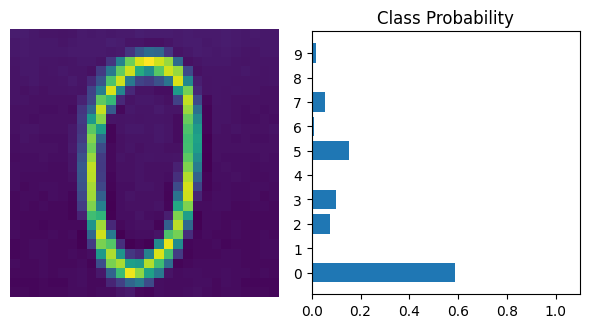

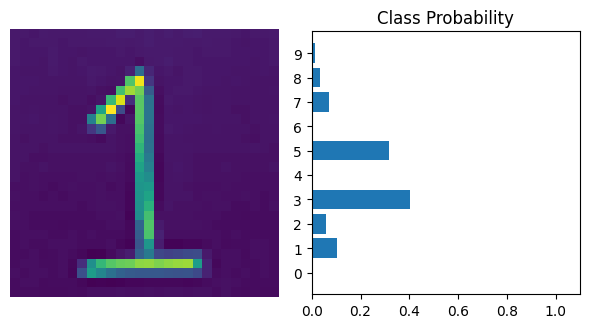

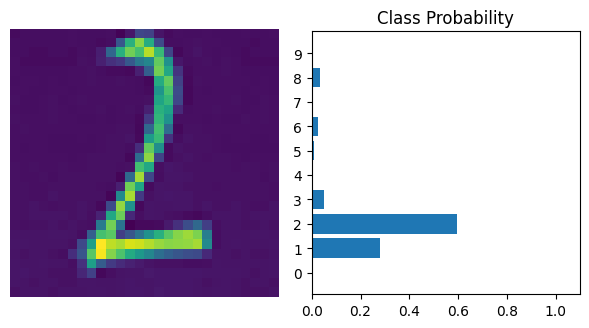

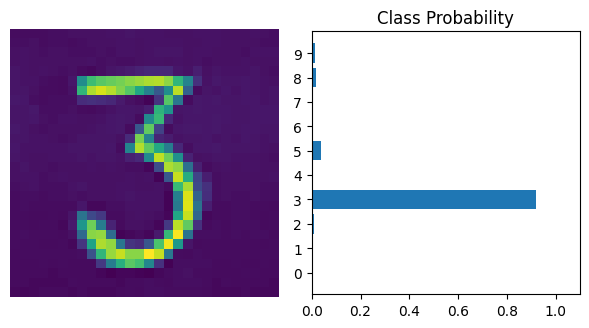

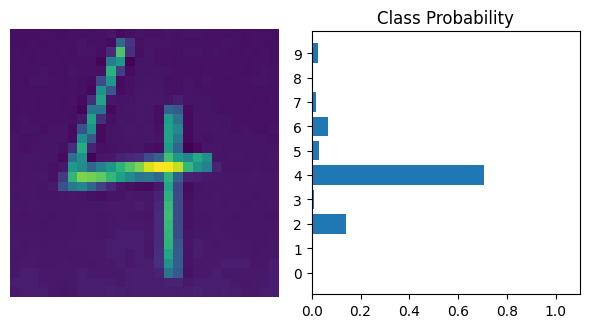

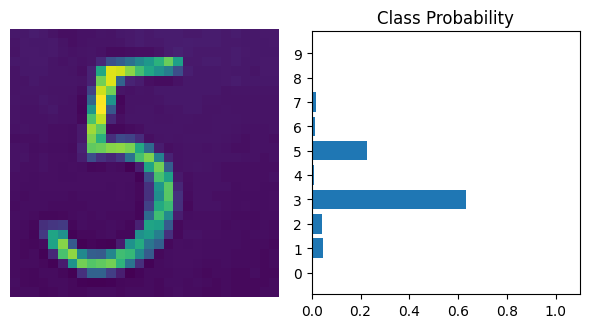

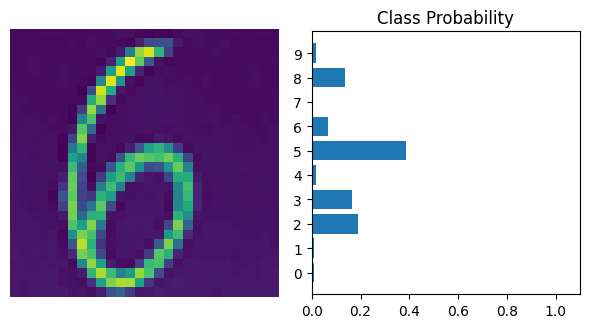

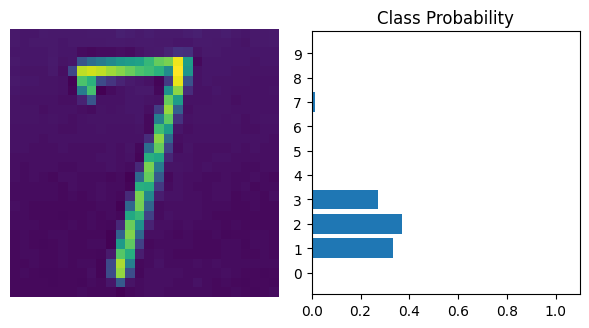

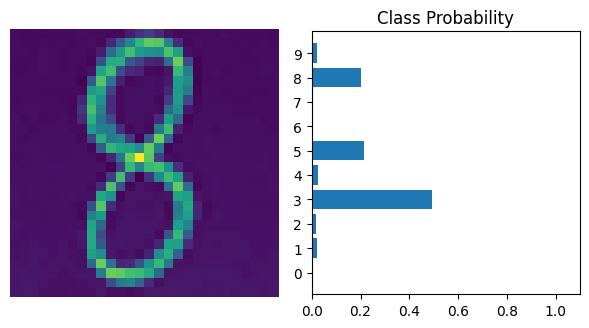

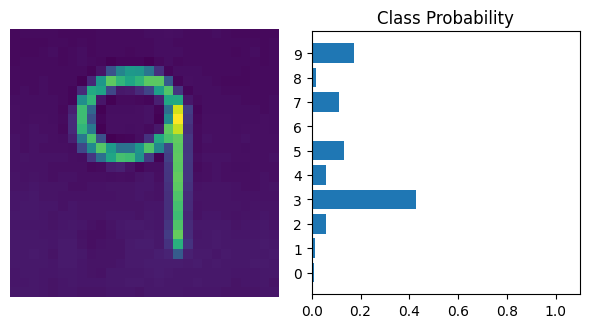

In [21]:
#if the image has a (black) handwritten digit over a white background, use this, else comment the whole cell out
from PIL import Image, ImageOps
import os

def preprocess_user_image(image_path):
    user_image = Image.open(image_path).convert("L")
    user_image = ImageOps.invert(user_image)  #add this line to invert image colors to the MNIST dataset form on which we have trained the model
    user_image = user_image.resize((28, 28))
    user_image = transform(user_image).view(1, 784)
    return user_image

# Get the path to the user's image

for image in os.listdir('blackonwhite'):
    user_image_path = os.path.join("blackonwhite/", image)
    if os.path.isfile(user_image_path):
        # Preprocess the user's image
        user_input = preprocess_user_image(user_image_path)

        # Use the trained model to make a prediction
        with torch.no_grad():
            logps = model(user_input)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])

        predicted_digit = probab.index(max(probab))
        print("Predicted Digit =", predicted_digit)
        view_classify(user_input.view(1, 28, 28), ps)